# Part I - (Prosper Loan Data)
## by (Savita Devi)

## Introduction
>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.I select 20 variable out of them for exploratory and explaintory purpose.


## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re


#### Load dataset 

In [2]:
df=pd.read_csv('prosperLoanData.csv')

In [3]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### Keeping columns which are needed for Analysis

In [5]:
df_clean=df.loc(axis=1)['ListingNumber','ListingCreationDate','Term','LoanStatus','ClosedDate','ListingCategory (numeric)',
                        'Occupation','EmploymentStatus','StatedMonthlyIncome','IncomeRange','LoanOriginationDate',
                        'LoanOriginalAmount','DebtToIncomeRatio','ProsperRating (Alpha)','ProsperScore','BorrowerAPR','BorrowerRate','MonthlyLoanPayment','Investors']
df_clean=df_clean.loc[df['LoanOriginationDate'] > '2009-07-31']

df_clean.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,ListingCategory (numeric),Occupation,EmploymentStatus,StatedMonthlyIncome,IncomeRange,LoanOriginationDate,LoanOriginalAmount,DebtToIncomeRatio,ProsperRating (Alpha),ProsperScore,BorrowerAPR,BorrowerRate,MonthlyLoanPayment,Investors
1,1209647,2014-02-27 08:28:07.900000000,36,Current,NaN,2,Professional,Employed,6125.000000,"$50,000-74,999",2014-03-03 00:00:00,10000,0.18,A,7.0,0.12016,0.0920,318.93,1
3,658116,2012-10-22 11:02:35.010000000,36,Current,NaN,16,Skilled Labor,Employed,2875.000000,"$25,000-49,999",2012-11-01 00:00:00,10000,0.15,A,9.0,0.12528,0.0974,321.45,158
4,909464,2013-09-14 18:38:39.097000000,36,Current,NaN,2,Executive,Employed,9583.333333,"$100,000+",2013-09-20 00:00:00,15000,0.26,D,4.0,0.24614,0.2085,563.97,20
5,1074836,2013-12-14 08:26:37.093000000,60,Current,NaN,1,Professional,Employed,8333.333333,"$100,000+",2013-12-24 00:00:00,15000,0.36,B,10.0,0.15425,0.1314,342.37,1
6,750899,2013-04-12 09:52:56.147000000,36,Current,NaN,1,Sales - Retail,Employed,2083.333333,"$25,000-49,999",2013-04-18 00:00:00,3000,0.27,E,2.0,0.31032,0.2712,122.67,1


In [6]:
df_clean['ProsperRating']=df_clean['ProsperRating (Alpha)']

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84967 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              84967 non-null  int64  
 1   ListingCreationDate        84967 non-null  object 
 2   Term                       84967 non-null  int64  
 3   LoanStatus                 84967 non-null  object 
 4   ClosedDate                 26119 non-null  object 
 5   ListingCategory (numeric)  84967 non-null  int64  
 6   Occupation                 83634 non-null  object 
 7   EmploymentStatus           84967 non-null  object 
 8   StatedMonthlyIncome        84967 non-null  float64
 9   IncomeRange                84967 non-null  object 
 10  LoanOriginationDate        84967 non-null  object 
 11  LoanOriginalAmount         84967 non-null  int64  
 12  DebtToIncomeRatio          77661 non-null  float64
 13  ProsperRating (Alpha)      84839 non-null  ob

#### Change datatype as required

In [7]:

df_clean["ListingNumber"]=df_clean["ListingNumber"].astype('str')
cols=['ListingCreationDate','ClosedDate','LoanOriginationDate']
df_clean[cols]=df_clean[cols].apply(pd.to_datetime, errors='coerce')
#df_clean['StatedMonthlyIncome']=df_clean['StatedMonthlyIncome'].astype('int64',errors='ignore')
# df.loc["a"] = np.int64(0)
#listings.price = listings.price.astype('int64', errors='ignore')
#df_clean['StatedMonthlyIncome']=df_clean['StatedMonthlyIncome'].apply(lambda x: '%.9f' % x)


#### Create a new variable AvgIncome

In [8]:

num=df_clean['IncomeRange'].str.split('-',n=1,expand=True)
 
# making separate first column from new data frame
df_clean["First"]= num[0]
 
# making separate last column from new data frame
df_clean["Last"]= num[1]
 
# Dropping old columns
df_clean.drop(columns =["IncomeRange"], inplace = True)

In [9]:
def fun(str):
    x=str.replace('$',"")
    return x
def fun1(str):
    x=str.replace('+',"")
    return x
def fun2(str):
    x=str.replace('Not displayed',"0")
    return x
def fun3(str):
    x=str.replace(',',"")
    return x
def fun4(str):
    x=str.replace('Not employed',"0")
    return x
df_clean['First']=df_clean['First'].apply(fun)
df_clean['First']=df_clean['First'].apply(fun1)
df_clean['First']=df_clean['First'].apply(fun2)
df_clean['First']=df_clean['First'].apply(fun4)
df_clean['First']=df_clean['First'].apply(fun3)
df_clean['Last'] =df_clean['Last'].fillna('0')
df_clean['Last']=df_clean['Last'].apply(fun3)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84967 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingNumber              84967 non-null  object        
 1   ListingCreationDate        84967 non-null  datetime64[ns]
 2   Term                       84967 non-null  int64         
 3   LoanStatus                 84967 non-null  object        
 4   ClosedDate                 26119 non-null  datetime64[ns]
 5   ListingCategory (numeric)  84967 non-null  int64         
 6   Occupation                 83634 non-null  object        
 7   EmploymentStatus           84967 non-null  object        
 8   StatedMonthlyIncome        84967 non-null  float64       
 9   LoanOriginationDate        84967 non-null  datetime64[ns]
 10  LoanOriginalAmount         84967 non-null  int64         
 11  DebtToIncomeRatio          77661 non-null  float64       
 12  Pro

In [10]:
df_clean['First']=df_clean['First'].astype('int')
df_clean['Last']=df_clean['Last'].astype('int')
df_clean['AvgIncome']=(df_clean['Last']+df_clean['First'])/2
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84967 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingNumber              84967 non-null  object        
 1   ListingCreationDate        84967 non-null  datetime64[ns]
 2   Term                       84967 non-null  int64         
 3   LoanStatus                 84967 non-null  object        
 4   ClosedDate                 26119 non-null  datetime64[ns]
 5   ListingCategory (numeric)  84967 non-null  int64         
 6   Occupation                 83634 non-null  object        
 7   EmploymentStatus           84967 non-null  object        
 8   StatedMonthlyIncome        84967 non-null  float64       
 9   LoanOriginationDate        84967 non-null  datetime64[ns]
 10  LoanOriginalAmount         84967 non-null  int64         
 11  DebtToIncomeRatio          77661 non-null  float64       
 12  Pro

In [11]:
df_clean=df_clean.drop(['First','Last'],axis=1)


#### Map values with Dict_listing and create a new column 

In [12]:
dict_listing={0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',
              5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',
              11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 
              15 : 'Medical/Dental', 16 : 'Motorcycle', 17: 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

In [13]:
df_clean['ListingCategory']=df_clean['ListingCategory (numeric)'].map(dict_listing)


df_clean.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,ListingCategory (numeric),Occupation,EmploymentStatus,StatedMonthlyIncome,LoanOriginationDate,...,DebtToIncomeRatio,ProsperRating (Alpha),ProsperScore,BorrowerAPR,BorrowerRate,MonthlyLoanPayment,Investors,ProsperRating,AvgIncome,ListingCategory
1,1209647,2014-02-27 08:28:07.900,36,Current,NaT,2,Professional,Employed,6125.000000,2014-03-03,...,0.18,A,7.0,0.12016,0.0920,318.93,1,A,62499.5,Home Improvement
3,658116,2012-10-22 11:02:35.010,36,Current,NaT,16,Skilled Labor,Employed,2875.000000,2012-11-01,...,0.15,A,9.0,0.12528,0.0974,321.45,158,A,37499.5,Motorcycle
4,909464,2013-09-14 18:38:39.097,36,Current,NaT,2,Executive,Employed,9583.333333,2013-09-20,...,0.26,D,4.0,0.24614,0.2085,563.97,20,D,50000.0,Home Improvement
5,1074836,2013-12-14 08:26:37.093,60,Current,NaT,1,Professional,Employed,8333.333333,2013-12-24,...,0.36,B,10.0,0.15425,0.1314,342.37,1,B,50000.0,Debt Consolidation
6,750899,2013-04-12 09:52:56.147,36,Current,NaT,1,Sales - Retail,Employed,2083.333333,2013-04-18,...,0.27,E,2.0,0.31032,0.2712,122.67,1,E,37499.5,Debt Consolidation


In [14]:
df_clean=df_clean.drop('ListingCategory (numeric)',axis=1)

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84967 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingNumber          84967 non-null  object        
 1   ListingCreationDate    84967 non-null  datetime64[ns]
 2   Term                   84967 non-null  int64         
 3   LoanStatus             84967 non-null  object        
 4   ClosedDate             26119 non-null  datetime64[ns]
 5   Occupation             83634 non-null  object        
 6   EmploymentStatus       84967 non-null  object        
 7   StatedMonthlyIncome    84967 non-null  float64       
 8   LoanOriginationDate    84967 non-null  datetime64[ns]
 9   LoanOriginalAmount     84967 non-null  int64         
 10  DebtToIncomeRatio      77661 non-null  float64       
 11  ProsperRating (Alpha)  84839 non-null  object        
 12  ProsperScore           84839 non-null  float64       
 13  

### What is the structure of your dataset?

> This data set contains 84984 loans with 20 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 13 variable are quantitative in nature and 7 are of qualititative.

>This Data set further filtered on data after july 2009 because most columns are hold values after july 2009 .

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting loan amount and which factors effect it.My main topic of interst are BorrowerRate, BorrowerAPR, prosper rating and prosper score.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I guess that the total loan amount will have a great effect on the APR of the loan and the borrowers stated monthly income, loan term, Prosper rating,
employment status will also have effects on the APR.I am exploring few other aspect too that i include in data set.


## Univariate Exploration



>Checking missing data

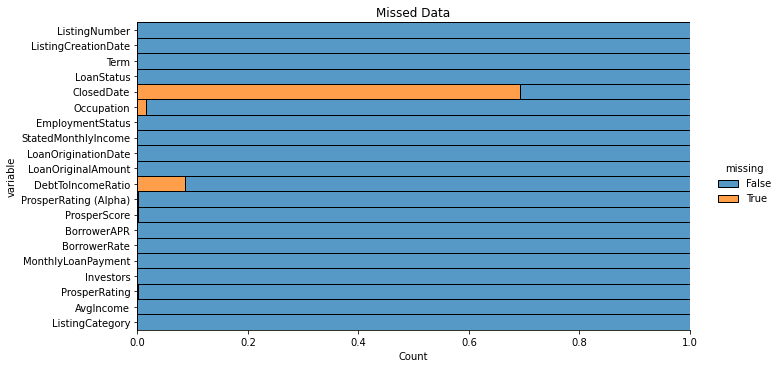

In [16]:
sb.displot(
 data=df_clean.isna().melt(value_name="missing"),
 y="variable",
 hue="missing",
 multiple="fill",
 aspect=2
);
plt.title('Missed Data');

#### missing data :
> Missing data in ClosedDate understandble because all loans are not closed.
some occupation are also not mentioned.but i am working on borreower income and rate so this won't concerned with that.some missing value in DebtToIncomeRation.Let see How it affect.

In [17]:
# convert into ordered categorical types
ordinal_var_dict = {'ProsperRating': ['AA','A','B','C','D','E','HR'],
                    'EmploymentStatus': ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed','Not available']}
                    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

#### I'll start by looking at the distribution of the variable of interest: Loan Amount

Text(0.5, 0, 'loan amount(&)')

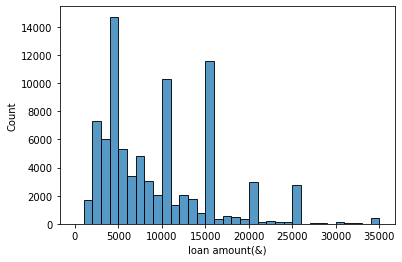

In [18]:
bins=np.arange(0,df_clean['LoanOriginalAmount'].max()+1000,1000)
sb.histplot(data=df_clean,x='LoanOriginalAmount',bins=bins);
plt.xlabel("loan amount(&)")

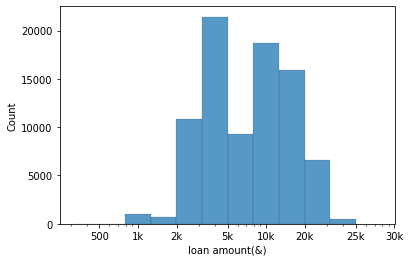

In [19]:
#let's check with log for clear picture
logbinsize=10**np.arange(2.5,np.log10(df_clean['LoanOriginalAmount'].max())+0.2,0.2);
sb.histplot(data=df_clean,x='LoanOriginalAmount',bins=logbinsize);
plt.xlabel("loan amount(&)")
plt.xscale('log')
plt.xticks([500,1e3,2e3, 5e3, 1e4, 2e4,5e4,1e5], [500,'1k','2k', '5k', '10k', '20k','25k','30k']);

> Seems like data skewed to right.

C:\Users\91798\AppData\Local\Temp\ipykernel_65880\720937700.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1);


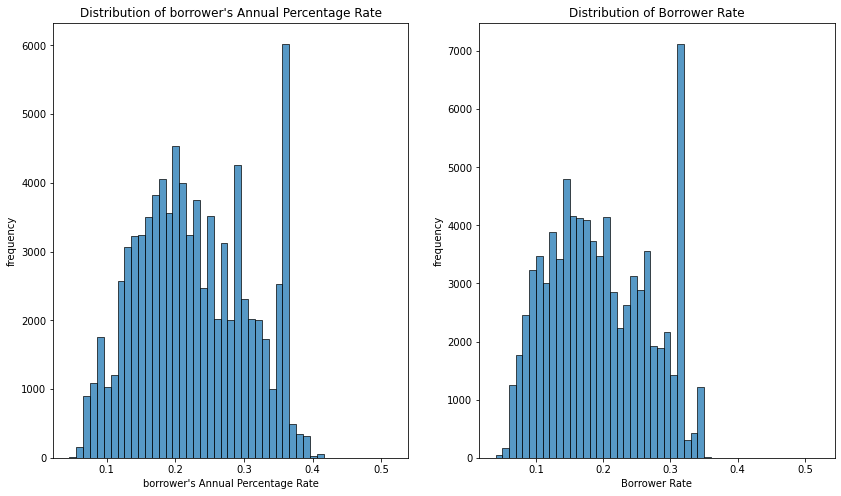

In [20]:
# Plot the distribution of BorrowerRate
plt.subplots(figsize = [14,8])
plt.subplot(1, 2, 1);
apr_bins = np.arange(df_clean.BorrowerAPR.min(),df_clean.BorrowerAPR.max()+0.1,0.01);
sb.histplot(data=df_clean, x='BorrowerAPR', bins=apr_bins);
plt.xlabel('borrower\'s Annual Percentage Rate');
plt.title('Distribution of borrower\'s Annual Percentage Rate');
plt.ylabel('frequency');


plt.subplot(1, 2, 2);
rate_bins = np.arange(df_clean['BorrowerRate'].min(),df_clean.BorrowerAPR.max()+0.1,0.01);
sb.histplot(data=df_clean, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Borrower Rate');
plt.ylabel('frequency');
plt.title('Distribution of Borrower Rate');


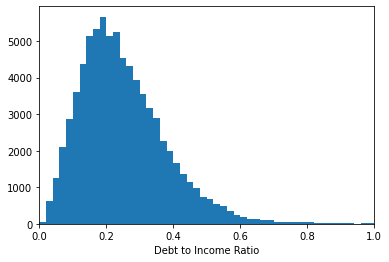

In [21]:


bins = np.arange(df_clean.DebtToIncomeRatio.min(),df_clean.DebtToIncomeRatio.max()+0.02,0.02)
plt.hist(data=df_clean, x='DebtToIncomeRatio', bins=bins);
plt.xlim(0,1);
plt.xlabel('Debt to Income Ratio');


>
The distribution of the DebtToIncomeRatio was skewed by the presence of
those with very high incomes to their debt. This isn't unexpected in a real-world scenario and no changes to the data were performed to account for this. It will be interesting to see how this affects the interest rates of the loans.

#### Analysis on stated monthly income of borower

Text(0.5, 0, 'Borrower annual rate')

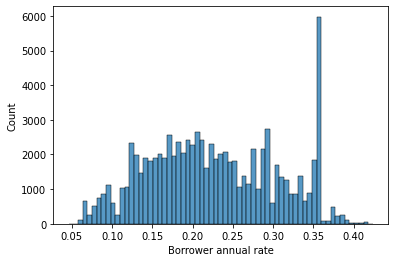

In [22]:
sb.histplot(data=df_clean,x='BorrowerAPR')
plt.xlabel("Borrower annual rate")

#### Further using log

Text(0.5, 0, 'monthly income($)')

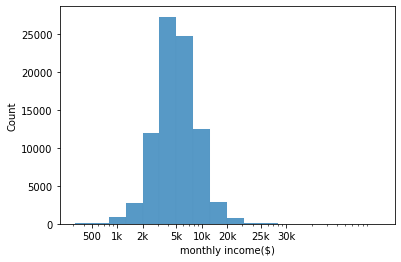

In [23]:

logbinsize=10**np.arange(2.5,np.log10(df_clean['StatedMonthlyIncome'].max()),0.2);
sb.histplot(data=df_clean,x='StatedMonthlyIncome',bins=logbinsize);
plt.xscale('log')
plt.xticks([500,1e3,2e3, 5e3, 1e4, 2e4,5e4,1e5], [500,'1k','2k', '5k', '10k', '20k','25k','30k']);
plt.xlabel("monthly income($)")

#### Analysis of monthly loan payment

Text(0.5, 0, 'monthly loan payment($)')

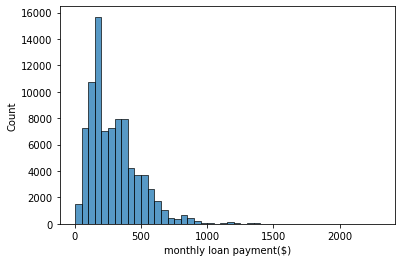

In [24]:
bins=np.arange(0,np.max(df_clean['MonthlyLoanPayment'])+50,50)
sb.histplot(data=df_clean,x='MonthlyLoanPayment',bins=bins);
plt.xlabel("monthly loan payment($)")

#### using log

Text(0.5, 0, 'monthly loan payment($)')

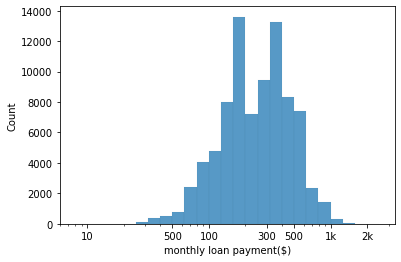

In [25]:
#using log
logbinsize=10**np.arange(0.9,np.log10(df_clean['MonthlyLoanPayment'].max())+0.1,0.1);
sb.histplot(data=df_clean,x='MonthlyLoanPayment',bins=logbinsize);
plt.xscale('log')
# ticks = [10, 30, 100, 300, 1000,3000]
# labels = ['{}'.format(v) for v in ticks]
# plt.xticks(ticks,labels);
plt.xticks([10, 50, 100, 300,500,1e3,2e3], [10, 500, 100, 300,500,'1k','2k']);
plt.xlabel("monthly loan payment($)")

#### Exploring qualitative variables

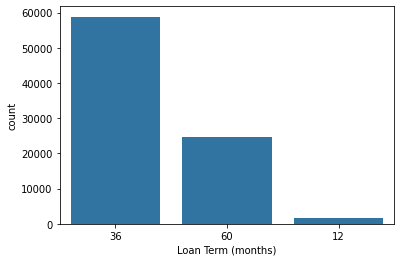

In [26]:
# Plot the Term 
base_color = sb.color_palette()[0]
type_order = df_clean['Term'].value_counts().index
sb.countplot(data=df_clean, x='Term', color=base_color, order=type_order);
plt.xlabel('Loan Term (months)');


> The length of most Common of the loans are 36 months Then it was followed by a long distance of 60 months which there were significantly fewer loans for 60-month terms and almost none for 12-month terms. Actually, this can affects directly in Borrower Rate


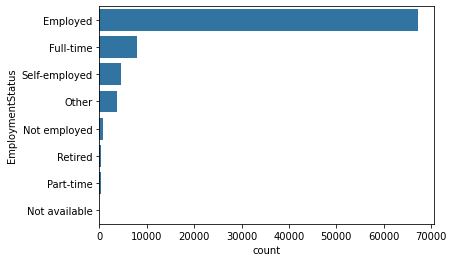

In [27]:

#Employment status
type_order = df_clean['EmploymentStatus'].value_counts().index
sb.countplot(data = df_clean, y = 'EmploymentStatus', color = base_color,order=type_order);

> Comman borrowers indicate “Employed” and “Full-Time” as employment status.


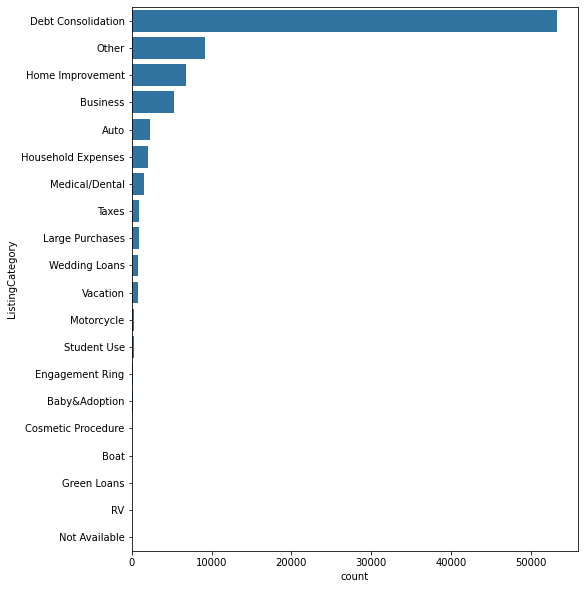

In [28]:
#listing category 

type_order = df_clean['ListingCategory'].value_counts().index
plt.subplots(figsize = [8,10])
sb.countplot(data = df_clean, y = 'ListingCategory', color = base_color,order=type_order)

plt.show()

> most loans are for debt consolidation,second most for other reasons. It
need more exploration either reasons effect borrower annual rate.

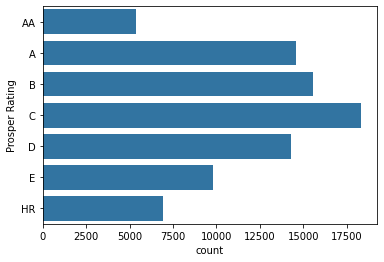

In [29]:

#type_order = df_clean['ProsperRating'].value_counts().index
sb.countplot(data=df_clean, y='ProsperRating', color=base_color)
plt.ylabel('Prosper Rating');


> The ratings of most common of the borrowers are among C to B

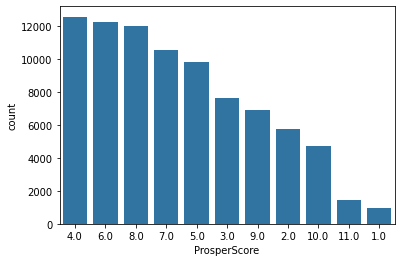

In [30]:
# prosper data
type_order = df_clean['ProsperScore'].value_counts().index
sb.countplot(data=df_clean, x='ProsperScore', color=base_color, order=type_order)
plt.xlabel('ProsperScore');


>It's observed that degree of risk between 0.4 : 0.8 .
which the most common rate is 0.4 this so interesting.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of Borrower Rate appears as normally distributed with some anomalies
skew. A small peak centered at 15%, a large peak centered at 30%, and a median
found between them. There is also a small peak centered 30%. Additionally, and
it's observed a few loans have a Borrower Rate greater than 35%.
There isn't need to implement any transformations.
In loan amount seems right skewed and monthly income seems normally distributed.
monthly loan payment show seems left skewed.Further invesigation show little skewed to right.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The distribution of the DebtToIncomeRatio was skewed by the presence of those with very high incomes to their debt. This isn't unexpected in a real-world scenario and no changes to the data were performed to account for this. It will be interesting to see how this affects the interest rates of the loans. 
For all of the bar charts that I used I reorded rank of them descending. So it's easy
to detect the most common.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in data. 

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84967 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingNumber          84967 non-null  object        
 1   ListingCreationDate    84967 non-null  datetime64[ns]
 2   Term                   84967 non-null  int64         
 3   LoanStatus             84967 non-null  object        
 4   ClosedDate             26119 non-null  datetime64[ns]
 5   Occupation             83634 non-null  object        
 6   EmploymentStatus       84967 non-null  category      
 7   StatedMonthlyIncome    84967 non-null  float64       
 8   LoanOriginationDate    84967 non-null  datetime64[ns]
 9   LoanOriginalAmount     84967 non-null  int64         
 10  DebtToIncomeRatio      77661 non-null  float64       
 11  ProsperRating (Alpha)  84839 non-null  object        
 12  ProsperScore           84839 non-null  float64       
 13  

<AxesSubplot: xlabel='LoanOriginalAmount', ylabel='MonthlyLoanPayment'>

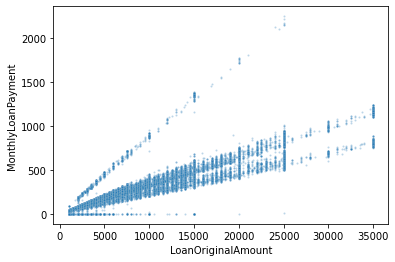

In [32]:
# relation between loan and monthly payment
sb.scatterplot(data=df_clean,x='LoanOriginalAmount',y='MonthlyLoanPayment',alpha=0.3,s=4)

> quit obivous monthly payment increase based on loan amount.
But with few exception

<AxesSubplot: xlabel='LoanOriginalAmount', ylabel='BorrowerAPR'>

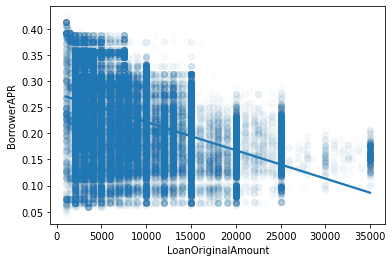

In [33]:
#relation between loan and borrower APR
sb.regplot(data=df_clean,x='LoanOriginalAmount',y='BorrowerAPR',scatter_kws={'alpha':1/50},x_jitter=0.3)

> This graph observed that at the different sizes of the total loan amount, the
borrower's APR has a large distribution, but the range of APR decreases with the
increase of loan amount. So the borrower's APR is negatively correlated with the
total loan amount.


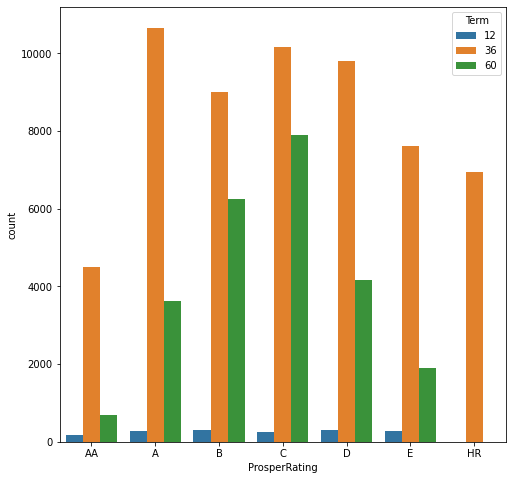

In [34]:
#Relation between term and prosper rating and score
fig, ax = plt.subplots( figsize = [8,8])
sb.countplot(data = df_clean, x = 'ProsperRating', hue = 'Term');


> It appears that there are some positive relationships between the
categorical variables and numeric variables of interest. The loans with 60-
month term loans were quite popular with those with a ProsperRating of A and C.As seen 36-month term loans are the most popular across risk score.



>Looking at the box plots for the distribution of the different credit risks and the BorrowerRate is that there is a negative correlation between having a better score and a lower interest rate. This is once again most pronouced in the results for the ProsperRating variable where the decline is steeper. With
the ProsperScore there is still a decilne, but the distribution of the BorrowerRate is more distributed and the IQR is genrally larger for each rating.



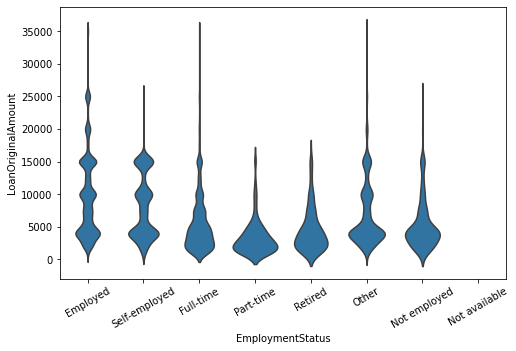

In [35]:
plt.figure(figsize = [8, 5]);


sb.violinplot(data =df_clean,x='EmploymentStatus',y='LoanOriginalAmount',color=base_color, inner=None);
plt.xticks(rotation=30);





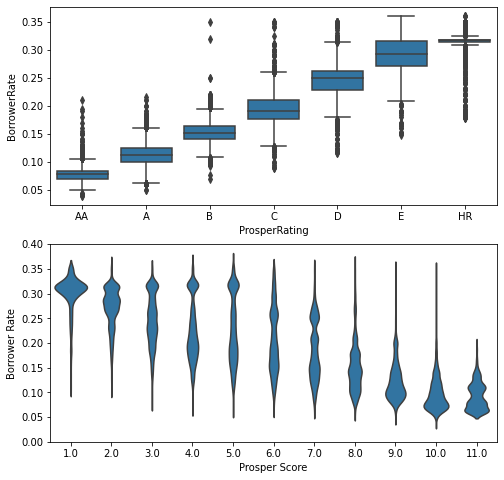

In [36]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

#plt.title("correlation between (the ProsperRating, and ProsperScore)")

sb.boxplot(data=df_clean, x='ProsperRating', y='BorrowerRate',color=base_color ,ax=ax[0]);
plt.ylim((0,0.4));
plt.xlabel("Prosper Rating");
plt.ylabel("Borrower Rate");

sb.violinplot(data=df_clean, x='ProsperScore', y='BorrowerRate',color=base_color, inner=None,ax=ax[1]);
plt.ylim((0,0.4));
plt.xlabel("Prosper Score");
plt.ylabel("Borrower Rate");



>Box plots show the distribution of the different the BorrowerRate
is that there is a negative correlation between having a higher score and a lower
interest rate. This is once again most pronounced in the results for the
ProsperRating (Alpha) variable where the decline is steeper. With ProsperScore
there is still a decline, but the distribution of the BorrowerRate is more distributed
and the IQR is generally larger for each rating

In [37]:
df_clean.head(5)

,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,Occupation,EmploymentStatus,StatedMonthlyIncome,LoanOriginationDate,LoanOriginalAmount,DebtToIncomeRatio,ProsperRating (Alpha),ProsperScore,BorrowerAPR,BorrowerRate,MonthlyLoanPayment,Investors,ProsperRating,AvgIncome,ListingCategory
1,1209647,2014-02-27 08:28:07.900,36,Current,NaT,Professional,Employed,6125.000000,2014-03-03,10000,0.18,A,7.0,0.12016,0.0920,318.93,1,A,62499.5,Home Improvement
3,658116,2012-10-22 11:02:35.010,36,Current,NaT,Skilled Labor,Employed,2875.000000,2012-11-01,10000,0.15,A,9.0,0.12528,0.0974,321.45,158,A,37499.5,Motorcycle
4,909464,2013-09-14 18:38:39.097,36,Current,NaT,Executive,Employed,9583.333333,2013-09-20,15000,0.26,D,4.0,0.24614,0.2085,563.97,20,D,50000.0,Home Improvement
5,1074836,2013-12-14 08:26:37.093,60,Current,NaT,Professional,Employed,8333.333333,2013-12-24,15000,0.36,B,10.0,0.15425,0.1314,342.37,1,B,50000.0,Debt Consolidation
6,750899,2013-04-12 09:52:56.147,36,Current,NaT,Sales - Retail,Employed,2083.333333,2013-04-18,3000,0.27,E,2.0,0.31032,0.2712,122.67,1,E,37499.5,Debt Consolidation


In [38]:
numeric_vars = ['StatedMonthlyIncome', 'MonthlyLoanPayment','LoanOriginalAmount','DebtToIncomeRatio','BorrowerRate','BorrowerAPR','Investors']
categoric_vars = ['Occupation', 'LoanStatus', 'ListingCategory']

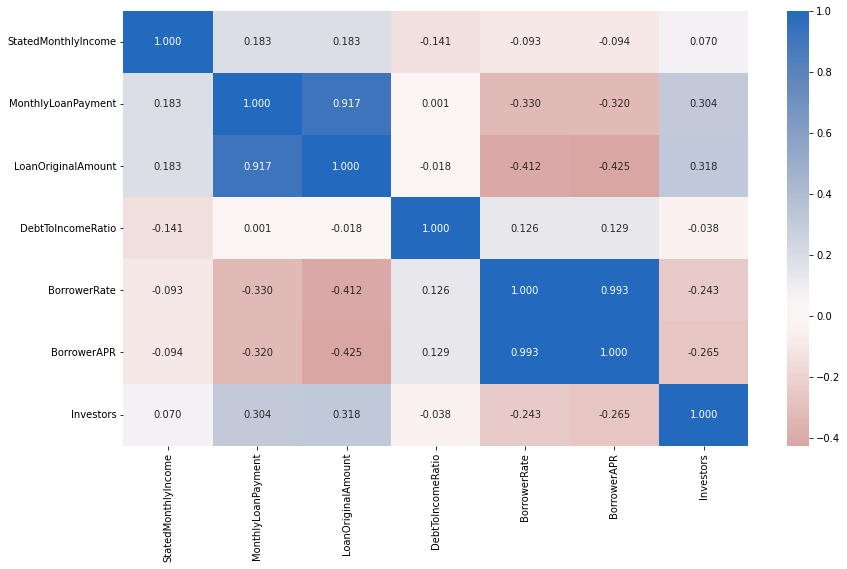

In [39]:
# correlation plot
plt.figure(figsize = [14, 8])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### How All numeric features behavior with All categorical features


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Distribution of the different credit risks annd the BorrowerRate is that there is a
negative correlation between having a better score and a lower interest
rate. This is once again most pronouced in the results for the ProsperRating
variable where the decline is steeper. With the ProsperScore there is still a
decilne, but the distribution of the BorrowerRate is more distributed and the IQR is genrally larger for each rating. the different sizes of the total loan amount, the borrower's APR has a large
distribution, but the range of APR decreases with the increase of loan amount. So
the borrower's APR is negatively correlated with the total loan amount.
 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Some positive relationships between the categorical variables and the two numeric
variables of interest. The loans with 60-month term loans were quite popular with
those with a ProsperRating of A and C. As seen before 36-month term loans are
the most popular across risk groups.
 

## Multivariate Exploration

> I am intersted in the stated monthly income and loan original amount variables effect on ProsperRating

<AxesSubplot: xlabel='LoanOriginalAmount', ylabel='MonthlyLoanPayment'>

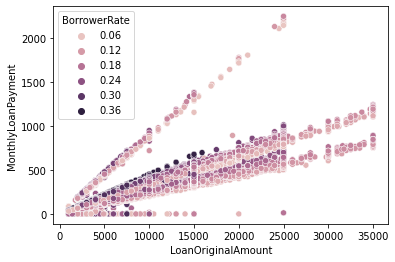

In [40]:

sb.scatterplot(data=df_clean, x="LoanOriginalAmount", y="MonthlyLoanPayment", hue="BorrowerRate")

>Borrow rate higher for mid level and lower level loans

<AxesSubplot: xlabel='ProsperRating', ylabel='BorrowerRate'>

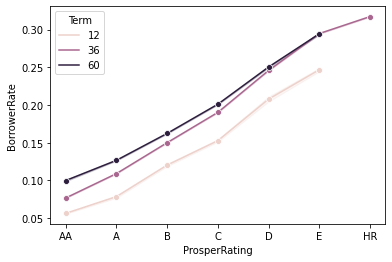

In [41]:
#rating ,term affect on borrower APR 


sb.lineplot(data = df_clean, x = 'ProsperRating', y = 'BorrowerRate',hue='Term',marker='o')


> The borrower Rate decreases with the increase of borrow term for
people with HR & C ratings. But for people with B & AA ratings, the rate increase
with the increase of borrow term.

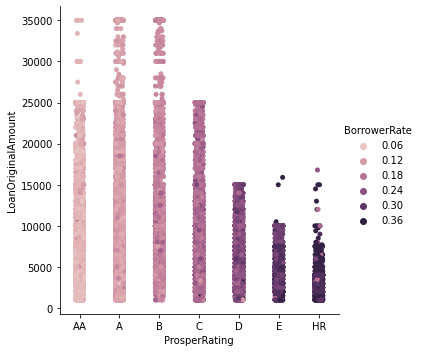

In [42]:

sb.catplot(data=df_clean, x="ProsperRating", y="LoanOriginalAmount", hue="BorrowerRate");

>The loan amount increases with the best rating. The borrower's rate decreases with the best rating. The relationship between borrower rate and loan amount have opposie effect on each other when the Prosper ratings are
increased from HR to A or higher. This may be because people with A or AA ratings tend to borrow more money, increasing the borrower's rate could prevent them borrow even more and maximizing the profit. But people with lower ratings
tend to borrow less money, decreasing the borrower's rate could encourage them to borrow more.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During investing the ProsperRating and the ProsperScore as it
relates to the BorrowerRate I could know an explanation for why the
ProsperScore wasn't as highly correlated to the BorrowerRate. It is opposite
the other credit risk features must use different criteria in coming up with its value.

### Were there any interesting or surprising interactions between features?

> A surprising interaction is that the borrower's APR and loan amount is
negative correction when the Prosper ratings are from HR to B, but the
correlation is turned to be positive when the ratings are A and AA. Another
interesting thing is that the borrower APR decreases with the increase of
borrow term for people with HR-C ratings. But for people with B-AA ratings,
the borrower's APR increase with the borrowing term.
BorrowerRate increases for longer Term loans when split up by
ProsperRating. The opposite relationship would be expected as
longer-term loans generally carry a lower risk profile and have a longer time
to accrue interest

## Conclusions
>The BorrowerRate tends to increase even for low amount loans when split up by ProsperRating. It seems that the rating has a greater impact on the BorrowerRate. A higher Prosper Rating generally indicates a lower risk profile and long term loans have a longer time to accrue interest. Both the BorrowerRate and the BorrowerAPR have a similar effect on the loan data, but for the purpose of presentation, I prefer to use the BorrowerRate.
